In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, confusion_matrix, recall_score, precision_score
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from joblib import load
import mlflow
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir(os.path.dirname(os.getcwd()))

In [4]:
df = pd.read_csv("data/train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7107 entries, 0 to 7106
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   App                                   7107 non-null   object 
 1   Category                              7107 non-null   object 
 2   Rating                                7107 non-null   float64
 3   Reviews                               7107 non-null   float64
 4   Size                                  7107 non-null   object 
 5   Installs                              7107 non-null   int64  
 6   Type                                  7107 non-null   object 
 7   Price                                 7107 non-null   float64
 8   Content Rating                        7107 non-null   object 
 9   Genres                                7107 non-null   object 
 10  Last Updated                          7107 non-null   object 
 11  Current Ver      

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Descargas', 'Descargas2', 'Descargas3', 'Categoria',
       'tamaño', 'tamaño2', 'Gratuito', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses',
       'version_actual', 'grupoversiones', 'version_android',
       'Genero_grp_Descargas_mean', 'Genero_grp_Descargas_median',
       'Genero_grp_Descargas_mode', 'Genero_grp_Rating_mean',
       'Genero_grp_Rating_median', 'Genero_grp_Rating_mode',
       'Genero_grp_Reviews_mean', 'Genero_grp_Reviews_median',
       'Genero_grp_Reviews_mode', 'Genero_grp_Descargas2_mean',
       'Genero_grp_Descargas2_median', 'Genero_grp_Descargas2_mode',
       'Genero_grp_Descargas3_mean', 'Genero_grp_Descargas3_median',
       'Genero_grp_Descargas3_mode', 'Tamaño2_grp_Descargas_mean',
       'Tamaño2_grp_Descargas_median', 'Tamaño2_grp_D

<Axes: >

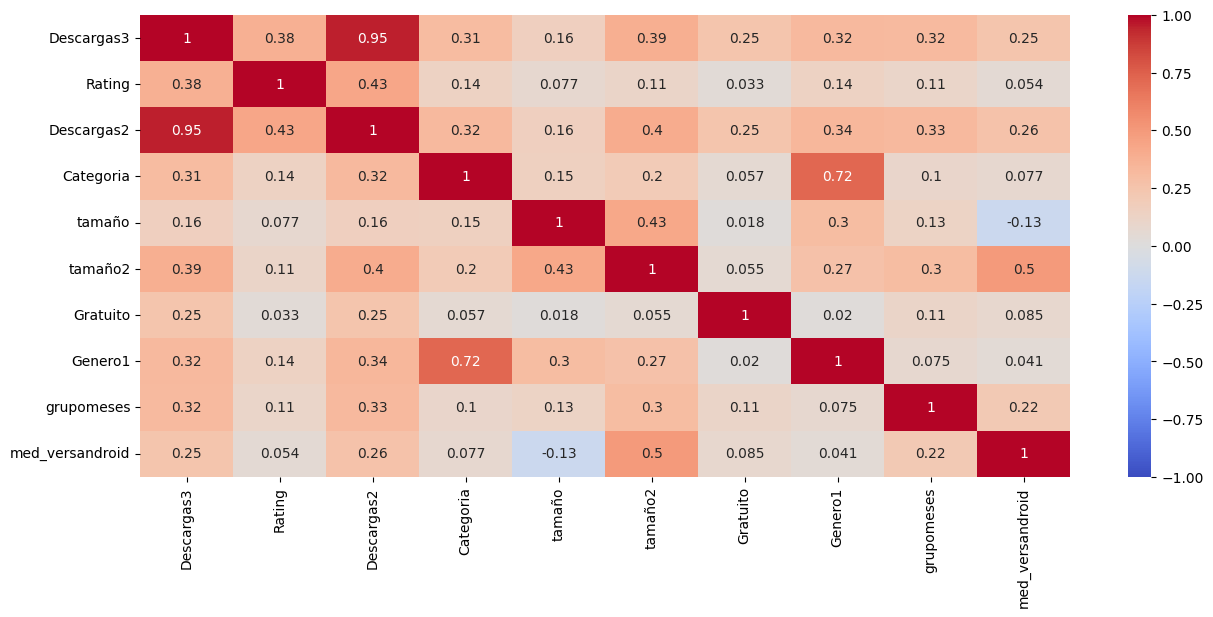

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(df[["Descargas3","Rating","Descargas2","Categoria","tamaño","tamaño2","Gratuito", "Genero1", "grupomeses", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [6]:
X = df[["Rating",'Price',
       'Categoria',
       'tamaño', 'tamaño2', 'Gratuito', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses',
       'version_android',
       'Genero_grp_Descargas_mean', 'Genero_grp_Descargas_median',
       'Genero_grp_Descargas_mode', 'Genero_grp_Rating_mean',
       'Genero_grp_Rating_median', 'Genero_grp_Rating_mode',
       'Genero_grp_Reviews_mean', 'Genero_grp_Reviews_median',
       'Genero_grp_Reviews_mode', 'Genero_grp_Descargas2_mean',
       'Genero_grp_Descargas2_median', 'Genero_grp_Descargas2_mode',
       'Genero_grp_Descargas3_mean', 'Genero_grp_Descargas3_median',
       'Genero_grp_Descargas3_mode', 'Tamaño2_grp_Descargas_mean',
       'Tamaño2_grp_Descargas_median', 'Tamaño2_grp_Descargas_mode',
       'Tamaño2_grp_Descargas2_mean', 'Tamaño2_grp_Descargas2_median',
       'Tamaño2_grp_Descargas2_mode', 'Tamaño2_grp_Descargas3_mean',
       'Tamaño2_grp_Descargas3_median', 'Tamaño2_grp_Descargas3_mode',
       'Tamaño2_grp_Reviews_mean', 'Tamaño2_grp_Reviews_median',
       'tipo_contenido_grp_Descargas_mean',
       'tipo_contenido_grp_Descargas_median',
       'tipo_contenido_grp_Descargas2_mean',
       'tipo_contenido_grp_Descargas2_median',
       'tipo_contenido_grp_Descargas3_mean',
       'tipo_contenido_grp_Descargas3_median',
       'tipo_contenido_grp_Reviews_mean', 'tipo_contenido_grp_Reviews_median',
       'grupomeses_grp_Reviews_mean', 'grupomeses_grp_Reviews_median',
       'version_android_grp_Reviews_mean',
       'version_android_grp_Reviews_median', 'med_versandroid']]
y = df[['Descargas3']]

In [8]:
final_test = pd.read_csv("data/test.csv")
final_test_x = final_test[["Rating",'Price',
       'Categoria',
       'tamaño', 'tamaño2', 'Gratuito', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses',
       'version_android',
       'Genero_grp_Descargas_mean', 'Genero_grp_Descargas_median',
       'Genero_grp_Descargas_mode', 'Genero_grp_Rating_mean',
       'Genero_grp_Rating_median', 'Genero_grp_Rating_mode',
       'Genero_grp_Reviews_mean', 'Genero_grp_Reviews_median',
       'Genero_grp_Reviews_mode', 'Genero_grp_Descargas2_mean',
       'Genero_grp_Descargas2_median', 'Genero_grp_Descargas2_mode',
       'Genero_grp_Descargas3_mean', 'Genero_grp_Descargas3_median',
       'Genero_grp_Descargas3_mode', 'Tamaño2_grp_Descargas_mean',
       'Tamaño2_grp_Descargas_median', 'Tamaño2_grp_Descargas_mode',
       'Tamaño2_grp_Descargas2_mean', 'Tamaño2_grp_Descargas2_median',
       'Tamaño2_grp_Descargas2_mode', 'Tamaño2_grp_Descargas3_mean',
       'Tamaño2_grp_Descargas3_median', 'Tamaño2_grp_Descargas3_mode',
       'Tamaño2_grp_Reviews_mean', 'Tamaño2_grp_Reviews_median',
       'tipo_contenido_grp_Descargas_mean',
       'tipo_contenido_grp_Descargas_median',
       'tipo_contenido_grp_Descargas2_mean',
       'tipo_contenido_grp_Descargas2_median',
       'tipo_contenido_grp_Descargas3_mean',
       'tipo_contenido_grp_Descargas3_median',
       'tipo_contenido_grp_Reviews_mean', 'tipo_contenido_grp_Reviews_median',
       'grupomeses_grp_Reviews_mean', 'grupomeses_grp_Reviews_median',
       'version_android_grp_Reviews_mean',
       'version_android_grp_Reviews_median', 'med_versandroid']]

final_test_y = final_test['Descargas3']

In [9]:
y.value_counts().sort_index()

Descargas3
0.0           1839
1.0           2458
2.0           2810
Name: count, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [10]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(model.score(X_train,y_train))
print("Accuracy",accuracy_score(y_test, predictions))
print("Recall",recall_score(y_test,predictions, average="macro"))
print("Conf. Matrix\n",confusion_matrix(y_test,predictions))

0.9992963940193491
Accuracy 0.629395218002813
Recall 0.6212069252494637
Conf. Matrix
 [[226 120  43]
 [ 73 265 142]
 [ 18 131 404]]


In [38]:
model.fit(X,y)
predictions = model.predict(final_test_x)
print("Accuracy",accuracy_score(final_test_y, predictions))

Accuracy 0.5514912774338773


In [39]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled,y_train_resampled)
predictions = model.predict(X_test)
print(model.score(X_train_resampled,y_train_resampled))
print("Accuracy", accuracy_score(y_test, predictions))
print("Recall",recall_score(y_test,predictions, average="macro"))
print("Conf. Matrix\n",confusion_matrix(y_test,predictions))

0.9993103448275862
Accuracy 0.6075949367088608
Recall 0.6078947154339266
Conf. Matrix
 [[254  97  38]
 [114 246 120]
 [ 35 154 364]]


In [40]:
model.fit(X_resampled,y_resampled)
predictions = model.predict(final_test_x)
print("Accuracy",accuracy_score(final_test_y, predictions))

Accuracy 0.5475520540236354


In [14]:
0.9961301671064204
0.5815752461322081
0.5680447022886254

0.5680447022886254

In [15]:
pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Rating,0.211205
8,dias_sin_actualizar,0.067664
3,tamaño,0.045544
1,Price,0.033150
9,meses_sin_actualizar,0.030889
5,Gratuito,0.026544
2,Categoria,0.025976
37,Tamaño2_grp_Reviews_median,0.025395
21,Genero_grp_Descargas2_mean,0.025070
11,version_android,0.023873


In [16]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = model.predict(X_test)
print(model.score(X_train,y_train))
print(accuracy_score(y_test, pred_xgb))
print(recall_score(y_test,pred_xgb, average="macro"))
print(confusion_matrix(y_test,pred_xgb))
pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_}).sort_values(by="Importance", ascending=False)

0.7769569041336851
0.6315049226441631
0.6299056282291859
[[256 105  28]
 [108 257 115]
 [ 28 140 385]]


,Feature,Importance
4,tamaño2,0.215009
0,Rating,0.097788
1,Price,0.097717
26,Genero_grp_Descargas3_mode,0.055703
2,Categoria,0.045554
36,Tamaño2_grp_Reviews_mean,0.044628
7,Genero1,0.040150
8,dias_sin_actualizar,0.034503
12,Genero_grp_Descargas_mean,0.034316
23,Genero_grp_Descargas2_mode,0.033304


In [17]:
xgb = XGBClassifier(max_depth=6)
xgb.fit(X_train_resampled, y_train_resampled)
pred_xgb = model.predict(X_test)
print(model.score(X_train_resampled,y_train_resampled))
print(accuracy_score(y_test, pred_xgb))
print(recall_score(y_test,pred_xgb, average="macro"))
print(confusion_matrix(y_test,pred_xgb))
pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_}).sort_values(by="Importance", ascending=False)

0.8147126436781609
0.6315049226441631
0.6299056282291859
[[256 105  28]
 [108 257 115]
 [ 28 140 385]]


,Feature,Importance
4,tamaño2,0.173148
1,Price,0.104304
0,Rating,0.097353
36,Tamaño2_grp_Reviews_mean,0.067870
26,Genero_grp_Descargas3_mode,0.064537
2,Categoria,0.040849
10,grupomeses,0.040808
7,Genero1,0.039452
12,Genero_grp_Descargas_mean,0.034819
8,dias_sin_actualizar,0.033878


In [18]:
X

,Rating,Price,Categoria,tamaño,tamaño2,Gratuito,tipo_contenido,Genero1,dias_sin_actualizar,meses_sin_actualizar,...,tipo_contenido_grp_Descargas2_median,tipo_contenido_grp_Descargas3_mean,tipo_contenido_grp_Descargas3_median,tipo_contenido_grp_Reviews_mean,tipo_contenido_grp_Reviews_median,grupomeses_grp_Reviews_mean,grupomeses_grp_Reviews_median,version_android_grp_Reviews_mean,version_android_grp_Reviews_median,med_versandroid
0,4.1,0.0,12.0,57000.0,5.0,1.0,0.0,35,2139,71.0,...,3.0,1.081434,1.0,211396.421263,1261.0,292585.161850,3285.0,358004.146772,1845.0,3.0
1,4.4,0.0,12.0,17000.0,3.0,1.0,2.0,18,2088,70.0,...,4.0,1.362720,2.0,474095.041562,16327.0,606282.576392,21979.0,53634.646113,1922.0,3.0
2,4.3,0.0,30.0,54000.0,5.0,1.0,0.0,41,2367,79.0,...,3.0,1.081434,1.0,211396.421263,1261.0,59425.743819,438.5,196336.739479,1168.0,3.0
3,2.8,0.0,29.0,3800.0,1.0,1.0,0.0,43,2796,93.0,...,3.0,1.081434,1.0,211396.421263,1261.0,25303.711364,311.5,93995.130152,1974.0,3.0
4,3.9,0.0,14.0,8800.0,2.0,1.0,2.0,17,2087,70.0,...,4.0,1.362720,2.0,474095.041562,16327.0,606282.576392,21979.0,53634.646113,1922.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7102,4.2,0.0,12.0,4200.0,1.0,1.0,0.0,3,2644,88.0,...,3.0,1.081434,1.0,211396.421263,1261.0,22634.404722,140.0,76407.947692,260.0,2.0
7103,4.0,0.0,12.0,8600.0,2.0,1.0,0.0,3,2148,72.0,...,3.0,1.081434,1.0,211396.421263,1261.0,292585.161850,3285.0,358004.146772,1845.0,3.0
7104,4.3,0.0,30.0,91000.0,5.0,1.0,2.0,40,2090,70.0,...,4.0,1.362720,2.0,474095.041562,16327.0,606282.576392,21979.0,121364.701923,1946.5,3.0
7105,4.4,0.0,29.0,0.0,6.0,1.0,0.0,43,2091,70.0,...,3.0,1.081434,1.0,211396.421263,1261.0,606282.576392,21979.0,124341.377358,668.0,2.0


# RandomForest con Y descompensado

In [47]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                       ('pca', PCA(n_components=12)),
    ('classifier', RandomForestClassifier())
])

rf_params = {
    'pca': [PCA(n_components=np.random.randint(15, 28)), None],
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'classifier': [RandomForestClassifier()],
    'classifier__min_samples_split': randint(15, 30),
    'classifier__min_samples_leaf': randint(5, 25),
    'classifier__class_weight': [None, 'balanced', "balanced_subsample"]
}
search_space = [
    rf_params  ]

random_search_rf = RandomizedSearchCV(pipe,
                           search_space,
                           n_iter=25,
                           scoring='f1_macro', 
                           refit='f1_macro',
                           cv=6,
                           n_jobs=-1,
                           verbose=1)


random_search_rf.fit(X_train, y_train)
print(random_search_rf.best_params_)
best_model_rf = random_search_rf.best_estimator_
predictions_rf = best_model_rf.predict(X_test)

print(best_model_rf.score(X_train, y_train))
print(accuracy_score(y_test, predictions_rf))
print(recall_score(y_test, predictions_rf, average="macro"))
print(precision_score(y_test, predictions_rf, average="macro"))
print(confusion_matrix(y_test, predictions_rf))

Fitting 6 folds for each of 25 candidates, totalling 150 fits
{'classifier': RandomForestClassifier(), 'classifier__class_weight': 'balanced', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 23, 'pca': None, 'scaler': StandardScaler()}
0.772207563764292
0.6343178621659634
0.6291175396541314
0.6413459542369538
[[238 123  28]
 [ 87 272 121]
 [ 18 143 392]]


In [48]:
best_model_rf.fit(X,y)
predictions_rf_final = best_model_rf.predict(final_test_x)
print(best_model_rf.score(X, y))
print(accuracy_score(final_test_y, predictions_rf_final))
print(precision_score(final_test_y,predictions_rf_final, average="macro"))
print(recall_score(final_test_y, predictions_rf_final, average="macro"))
print(confusion_matrix(final_test_y, predictions_rf_final))

0.7705079499085409
0.5481148002250985
0.5718672590208592
0.5463132866769008
[[275 165  65]
 [102 304 187]
 [ 22 262 395]]


In [21]:
"""{'classifier': RandomForestClassifier(), 'classifier__class_weight': None,
  'classifier__criterion': 'gini', 'classifier__max_depth': 84, 'classifier__max_features': 'sqrt', 
  'classifier__min_samples_split': 18, 'classifier__n_estimators': 266, 'pca': None, 'scaler': StandardScaler()}"""

"{'classifier': RandomForestClassifier(), 'classifier__class_weight': None,\n  'classifier__criterion': 'gini', 'classifier__max_depth': 84, 'classifier__max_features': 'sqrt', \n  'classifier__min_samples_split': 18, 'classifier__n_estimators': 266, 'pca': None, 'scaler': StandardScaler()}"

#### Comprobado en varias iteraciones que el PCA sin resamplear empeora el score del modelo. Hace falta probar si fijándolo o eliminandolo mejoran los resultados.

In [52]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                       ("selectkbest", SelectKBest(score_func=f_classif)),
                       ('classifier', RandomForestClassifier())
])

rf_params = {
    'selectkbest__k': range(1, 52),
    'scaler': [None],
    'classifier': [RandomForestClassifier()],
    'classifier__min_samples_split': randint(15, 35),
    'classifier__class_weight': [None, 'balanced', "balanced_subsample"]
}
search_space = [
    rf_params  ]

random_search_rf2 = RandomizedSearchCV(pipe,
                           search_space,
                           n_iter=30,
                           scoring='f1_macro', 
                           refit='f1_macro',
                           cv=8,
                           n_jobs=-1,
                           verbose=1,
                           random_state=42)


random_search_rf2.fit(X_train, y_train)
print(random_search_rf2.best_params_)
best_model_rf2 = random_search_rf2.best_estimator_
predictions_rf2 = best_model_rf2.predict(X_test)

print(best_model_rf2.score(X_train, y_train))
print(accuracy_score(y_test, predictions_rf2))
print(recall_score(y_test, predictions_rf2, average="macro"))
print(precision_score(y_test, predictions_rf2, average="macro"))
print(confusion_matrix(y_test, predictions_rf2))

Fitting 8 folds for each of 30 candidates, totalling 240 fits
{'classifier': RandomForestClassifier(), 'classifier__class_weight': 'balanced_subsample', 'classifier__min_samples_split': 29, 'scaler': None, 'selectkbest__k': 51}
0.7741424802110818
0.6272855133614628
0.6230898121074165
0.6387842066121062
[[238 122  29]
 [ 82 272 126]
 [ 15 156 382]]


In [53]:
best_model_rf2.fit(X_resampled,y_resampled)
predictions_rf_final2 = best_model_rf2.predict(final_test_x)
print(best_model_rf2.score(X_resampled, y_resampled))
print(accuracy_score(final_test_y, predictions_rf_final2))
print(precision_score(final_test_y,predictions_rf_final2, average="macro"))
print(recall_score(final_test_y, predictions_rf_final2, average="macro"))
print(confusion_matrix(final_test_y, predictions_rf_final2))

0.7761464564074678
0.5537422622397299
0.574618066980213
0.5538576391521187
[[291 159  55]
 [111 303 179]
 [ 25 264 390]]


In [24]:
"""import pickle

filename = 'models/rf_+rating_MS080_ACC596_PS637_RS589_.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model_rf2, archivo_salida)"""

"import pickle\n\nfilename = 'models/rf_+rating_MS080_ACC596_PS637_RS589_.pkl'\n\nwith open(filename, 'wb') as archivo_salida:\n    pickle.dump(best_model_rf2, archivo_salida)"

# RandomForest con resample.

In [25]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                       ('pca', PCA(n_components=12)),
    ('classifier', RandomForestClassifier())
])

rf_params = {
    'pca': [PCA(n_components=np.random.randint(4, 17)), None],
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': randint(100, 1000),
    'classifier__max_features': [ 'sqrt', 'log2', None],
    'classifier__max_depth': [None] + list(randint(3, 500).rvs(10)),
    'classifier__min_samples_split': randint(10, 21),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced', "balanced_subsample"]
}
search_space = [
    rf_params  ]

random_search_rfr = RandomizedSearchCV(pipe,
                           search_space,
                           n_iter=100,
                           scoring='f1_macro', 
                           refit='f1_macro',
                           cv=6,
                           n_jobs=-1,
                           verbose=1,
                           random_state=42)


random_search_rfr.fit(X_train_resampled, y_train_resampled)
print(random_search_rfr.best_params_)
best_model_rfr = random_search_rfr.best_estimator_
predictions_rfr = best_model_rfr.predict(X_test)

print(best_model_rfr.score(X_train_resampled, y_train_resampled))
print(accuracy_score(y_test, predictions_rfr))
print(recall_score(y_test, predictions_rfr, average="macro"))
print(precision_score(y_test, predictions_rfr, average="macro"))
print(confusion_matrix(y_test, predictions_rfr))

Fitting 6 folds for each of 100 candidates, totalling 600 fits


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'classifier': RandomForestClassifier(), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_split': 19, 'classifier__n_estimators': 783, 'pca': None, 'scaler': None}
0.8579310344827586
0.6350210970464135
0.629824761383082
0.6508706386785444
[[233 130  26]
 [ 75 287 118]
 [ 13 157 383]]


In [26]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [27]:
best_model_rfr.fit(X_resampled,y_resampled)
predictions_rfr_final = best_model_rfr.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_rfr_final))
print(precision_score(final_test_y,predictions_rfr_final, average="macro"))
print(recall_score(final_test_y, predictions_rfr_final, average="macro"))
print(confusion_matrix(final_test_y, predictions_rfr_final))

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.558244231851435
0.5823287113388173
0.5614876197030179
[[299 166  40]
 [ 98 336 159]
 [ 48 274 357]]


In [56]:
pipe_multi = Pipeline(steps=[("scaler", StandardScaler()),
                             ("selectkbest", SelectKBest(score_func=f_classif)),
                             ('classifier', RandomForestClassifier())
])

xgb_params = {
    'selectkbest__k': range(1, 52),
    "scaler": [StandardScaler(), MinMaxScaler()],
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': randint(50, 500),
    "classifier__learning_rate": [0.001, 0.01, 0.1, 0.5, 1.0],
    "classifier__min_child_weight": randint(1, 11),
    "classifier__subsample": [0.5, 0.7, 0.9, 1.0],
    "classifier__colsample_bytree": [0.5, 0.7, 0.9, 1.0]
    
}

knn_params = {
    'selectkbest__k': range(1, 52),
    "scaler": [StandardScaler(), MinMaxScaler()],
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors':randint(1, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}


gb_params = {
    'selectkbest__k': range(1, 52),
    "scaler": [StandardScaler(), MinMaxScaler()],
    'classifier': [GradientBoostingClassifier()],
    'classifier__n_estimators': randint(50, 500),
    'classifier__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'classifier__min_samples_split': randint(2, 25),
    'classifier__min_samples_leaf': randint(1, 11),
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0]
}

search_space_multi = [
    xgb_params,
    knn_params,
    gb_params  ]


rsm_multi = RandomizedSearchCV(pipe_multi,
                           search_space_multi,
                           n_iter=100,
                           scoring='f1_macro', 
                           refit='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           random_state=42)

rsm_multi.fit(X_train, y_train)
print(rsm_multi.best_params_)
best_model_multi = rsm_multi.best_estimator_
predictions_multi = best_model_multi.predict(X_test)

print(best_model_multi.score(X_train, y_train))
print(accuracy_score(y_test, predictions_multi))
print(precision_score(y_test, predictions_multi, average="macro"))
print(recall_score(y_test, predictions_multi, average="macro"))
print(confusion_matrix(y_test, predictions_multi))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 102, 'classifier__subsample':

In [57]:
print("Resultados X e y resampleados:")
best_model_multi.fit(X_resampled,y_resampled)
predictions_multi_final = best_model_multi.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_multi_final))
print(precision_score(final_test_y,predictions_multi_final, average="macro"))
print(recall_score(final_test_y, predictions_multi_final, average="macro"))
print(confusion_matrix(final_test_y, predictions_multi_final))

print("Resultados X e y completos:")
best_model_multi.fit(X,y)
predictions_multi_final2 = best_model_multi.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_multi_final2))
print(precision_score(final_test_y,predictions_multi_final2, average="macro"))
print(recall_score(final_test_y, predictions_multi_final2, average="macro"))
print(confusion_matrix(final_test_y, predictions_multi_final2))



Resultados X e y resampleados:
0.638716938660664
0.6491520833989282
0.634849194039303
[[316 158  31]
 [ 99 340 154]
 [ 22 178 479]]
Resultados X e y completos:
0.6437816544738323
0.6666527105345961
0.6362667621273648
[[289 178  38]
 [ 66 362 165]
 [ 14 172 493]]


In [31]:
pipe_xgb = Pipeline(steps=[("scaler", StandardScaler()),
                             ("selectkbest", SelectKBest(score_func=f_classif)),
                             ('classifier', RandomForestClassifier())
])

xgb_params = {
    'selectkbest__k': range(35, 52),
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': randint(700, 800),  
    "classifier__learning_rate": [0.001,0.1, 0.15],  
    "classifier__min_child_weight": randint(15, 25),  
    "classifier__subsample": [0.9],
    
}


search_space_xgb = [
    xgb_params ]


rsm_xgb = RandomizedSearchCV(pipe_multi,
                           search_space_xgb,
                           n_iter=1000,
                           scoring='accuracy', 
                           refit='accuracy',
                           cv=8,
                           n_jobs=-1,
                           verbose=1,
                           random_state=42)

rsm_xgb.fit(X_train, y_train)
print(rsm_xgb.best_params_)
best_model_xgb = rsm_xgb.best_estimator_
predictions_xgb = best_model_xgb.predict(X_test)

print(best_model_xgb.score(X_train, y_train))
print(accuracy_score(y_test, predictions_xgb))
print(precision_score(y_test, predictions_xgb, average="macro"))
print(recall_score(y_test, predictions_xgb, average="macro"))
print(confusion_matrix(y_test, predictions_xgb))

Fitting 8 folds for each of 1000 candidates, totalling 8000 fits


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.001, 'classifier__min_child_weight': 15, 'classifier__n_estimators': 788, 'classifier__subsample': 0.9, 'scaler': None, 'selectkbest__k': 43}
0.6788038698328935
0.6251758087201125
0.6675376769081

In [32]:
print("Resultados X e y resampleados:")
best_model_xgb.fit(X_resampled,y_resampled)
predictions_xgb_final1 = best_model_xgb.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_xgb_final1))
print(precision_score(final_test_y,predictions_xgb_final1, average="macro"))
print(recall_score(final_test_y, predictions_xgb_final1, average="macro"))
print(confusion_matrix(final_test_y, predictions_xgb_final1))

print("Resultados X e y completos:")
best_model_xgb.fit(X,y)
predictions_xgb_final2 = best_model_xgb.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_xgb_final2))
print(precision_score(final_test_y,predictions_xgb_final2, average="macro"))
print(recall_score(final_test_y, predictions_xgb_final2, average="macro"))
print(confusion_matrix(final_test_y, predictions_xgb_final2))

Resultados X e y resampleados:


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6285875070343275
0.6638063412042452
0.6219521802918034
[[276 199  30]
 [ 63 378 152]
 [ 10 206 463]]
Resultados X e y completos:


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.642656162070906
0.6829669291095813
0.633263756628465
[[272 202  31]
 [ 41 374 178]
 [  8 175 496]]


In [33]:
"""import pickle

filename = 'models/xgb_+rating_MS072_ACC652_PS686_RS641_.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model_xgb, archivo_salida)"""

"import pickle\n\nfilename = 'models/xgb_+rating_MS072_ACC652_PS686_RS641_.pkl'\n\nwith open(filename, 'wb') as archivo_salida:\n    pickle.dump(best_model_xgb, archivo_salida)"

In [34]:
pipe_xgb = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier())
])

xgb_params = {
    'selectkbest__k': range(37, 42),
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': [900, 950, 1000, 1050],  
    "classifier__learning_rate": [0.1, 0.15],  
    "classifier__min_child_weight": range(15, 27),  # Note: Changed to range instead of randint
    "classifier__subsample": [0.8,0.9],
}

search_space_xgb2 = [xgb_params]

grid_search_xgb = GridSearchCV(pipe_xgb,
                                search_space_xgb2,
                                scoring='accuracy', 
                                refit='accuracy',
                                cv=8,
                                n_jobs=-1,
                                verbose=1)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_params_)
best_model_xgb2 = grid_search_xgb.best_estimator_
predictions_xgb2 = best_model_xgb.predict(X_test)

print(best_model_xgb2.score(X_train, y_train))
print(accuracy_score(y_test, predictions_xgb2))
print(precision_score(y_test, predictions_xgb2, average="macro"))
print(recall_score(y_test, predictions_xgb2, average="macro"))
print(confusion_matrix(y_test, predictions_xgb2))

Fitting 8 folds for each of 1872 candidates, totalling 14976 fits


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.1, 'classifier__min_child_weight': 25, 'classifier__n_estimators': 900, 'classifier__subsample': 0.9, 'scaler': StandardScaler(), 'selectkbest__k': 39}
0.9204925241864556
0.6371308016877637
0.676

In [35]:
print(grid_search_xgb.best_params_)
best_model_xgb2 = grid_search_xgb.best_estimator_
predictions_xgb2 = best_model_xgb2.predict(X_test)

print(best_model_xgb2.score(X_train, y_train))
print(accuracy_score(y_test, predictions_xgb2))
print(precision_score(y_test, predictions_xgb2, average="macro"))
print(recall_score(y_test, predictions_xgb2, average="macro"))
print(confusion_matrix(y_test, predictions_xgb2))

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.1, 'classifier__min_child_weight': 25, 'classifier__n_estimators': 900, 'classifier__subsample': 0.9, 'scaler': StandardScaler(), 'selectkbest__k': 39}
0.9204925241864556
0.6350210970464135
0.643

In [36]:
print("Resultados X e y resampleados:")
best_model_xgb2.fit(X_resampled,y_resampled)
predictions_xgb_final3 = best_model_xgb2.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_xgb_final3))
print(precision_score(final_test_y,predictions_xgb_final3, average="macro"))
print(recall_score(final_test_y, predictions_xgb_final3, average="macro"))
print(confusion_matrix(final_test_y, predictions_xgb_final3))

print("Resultados X e y completos:")
best_model_xgb2.fit(X,y)
predictions_xgb_final4 = best_model_xgb2.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_xgb_final4))
print(precision_score(final_test_y,predictions_xgb_final4, average="macro"))
print(recall_score(final_test_y, predictions_xgb_final4, average="macro"))
print(confusion_matrix(final_test_y, predictions_xgb_final4))

Resultados X e y resampleados:


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5993247045582443
0.6080688521850541
0.5994174687618545
[[324 150  31]
 [128 306 159]
 [ 31 213 435]]
Resultados X e y completos:


c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6263365222284749
0.6434719864011467
0.62338148097047
[[315 152  38]
 [ 88 333 172]
 [ 14 200 465]]


In [86]:
with open(r'C:\Users\javie\Documents\Bootcamp\Alumno\PROYECTO MACHINE LEARNING - copia\Proyecto_ML\models\best_model\xgb_+rating_MS072_ACC652_PS686_RS641_.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)


In [87]:
modelo_cargado.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=13, mi

In [88]:
modelo_cargado.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=13, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=621, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [89]:
print(modelo_cargado.score(X, y))

0.716617419445617


In [134]:
pdns = modelo_cargado.predict(final_test_x)


print("Model Score:\t",modelo_cargado.score(X, y))
print("Accuracy Score:\t",accuracy_score(final_test_y, pdns))
print("Precision Score:",precision_score(final_test_y, pdns, average="macro"))
print("Recall Score:\t",recall_score(final_test_y, pdns, average="macro"))

Model Score:	 0.716617419445617
Accuracy Score:	 0.6527855936972425
Precision Score: 0.6863132190459046
Recall Score:	 0.6419311329389973


In [131]:
class_labels = ["-10k","10k - 1M", "+1M"]

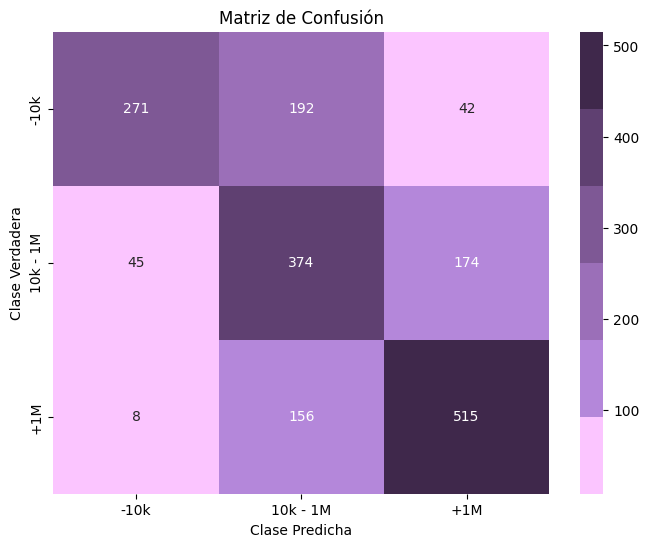

In [141]:
custom_palette = sns.color_palette(["#3f284b", "#5f4071", "#7e5895", "#9b6fb8", "#b487da", "#fbc5ff"])[::-1]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(final_test_y, pdns), annot=True, cmap=custom_palette, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
from prefect import task, Flow
from sklearn.pipeline import Pipeline
import yaml
from joblib import load

In [15]:
parametros_pipeline = {}
for nombre_paso, paso in modelo_cargado.named_steps.items():
    parametros_pipeline[nombre_paso] = paso.get_params()

In [16]:
with open('models/best_model/model_config.yaml', 'w') as archivo_yaml:
        yaml.dump(parametros_pipeline, archivo_yaml)

In [14]:
best_params = {
    'selectkbest__k': 42,
    'scaler': StandardScaler(),
    'classifier': XGBClassifier(learning_rate=0.01, 
                                min_child_weight=13, 
                                n_estimators=621,
                                )
}

# Construcción del pipeline con los mejores parámetros
best_pipeline = Pipeline(steps=[
    ("scaler", best_params['scaler']),
    ("selectkbest", SelectKBest(k=best_params['selectkbest__k'])),
    ("classifier", best_params['classifier'])
    ])

In [15]:
best_pipeline.fit(X_train,y_train)

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=13, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=621, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [119]:
pipe_xgb = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest(k=42)),
    ('classifier', RandomForestClassifier())
])

xgb_params = {
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': range(615,630),  
    "classifier__learning_rate": [0.05, 0.01],  
    "classifier__min_child_weight": range(5,15),
    "classifier__objetive": ["multi:softprob"],
    "classifier__colsample_bytree": [0.8, 0.9, 1.0]
}

search_space_xgb2 = [xgb_params]

grid_search_xgb_final = GridSearchCV(pipe_xgb,
                                search_space_xgb2,
                                scoring='f1_macro', 
                                refit='f1_macro',
                                cv=8,
                                n_jobs=-1,
                                verbose=1)

grid_search_xgb_final.fit(X_train, y_train)

print(grid_search_xgb_final.best_params_)
best_model_xgb_final = grid_search_xgb_final.best_estimator_
predictions_xgb_final = best_model_xgb_final.predict(X_test)

print("Resultados en Train")
print(best_model_xgb_final.score(X_train, y_train))
print(accuracy_score(y_test, predictions_xgb_final))
print(precision_score(y_test, predictions_xgb_final, average="macro"))
print(recall_score(y_test, predictions_xgb_final, average="macro"))

print("Resultados en test")
best_model_xgb_final.fit(X,y)
predictions_xgb_final_test = best_model_xgb_final.predict(final_test_x)
print(accuracy_score(final_test_y, predictions_xgb_final_test))
print(precision_score(final_test_y,predictions_xgb_final_test, average="macro"))
print(recall_score(final_test_y, predictions_xgb_final_test, average="macro"))
print(confusion_matrix(final_test_y, predictions_xgb_final_test))

Fitting 8 folds for each of 900 candidates, totalling 7200 fits


KeyboardInterrupt: 

Fitting 8 folds for each of 5 candidates, totalling 40 fits
{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.01, 'classifier__min_child_weight': 12, 'classifier__n_estimators': 750}
Resultados en Train
0.7336851363236587
0.6336146272855133
0.6656525601212239
0.6197039414726766
Resultados en test
0.6533483398987057
0.6837848929261671
0.6428582993951716
[[274 193  38]
 [ 50 373 170]
 [  9 156 514]]